In [1]:
import os
import sys
import time
from skimage import io
from skimage.color import rgb2gray
from blockmatching import *
from utils import compute_census
import matplotlib.pyplot as plt
import cv2

%load_ext autoreload
%autoreload 2

In [62]:
mode = "cones"
Ig = f"../{mode}/im2.png"
Id = f"../{mode}/im6.png"
gt = f"../{mode}/im2.png"
occl = f"../{mode}/occl.png"

Ig = cv2.imread(Ig, cv2.IMREAD_GRAYSCALE)
Id = cv2.imread(Id, cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(gt, cv2.IMREAD_GRAYSCALE)
occl = cv2.imread(occl, cv2.IMREAD_GRAYSCALE)

In [63]:
from blockmatching import block_matching, block_matching_NCC, SAD, SSD, ZSSD, ZNSSD, NCC, GC, mode_filter
from utils import compute_census

In [66]:
start_time = time.time()

Ig, Id = compute_census(Ig, Id, (3,3))
disp = block_matching(Ig, Id, 7, 64, ZSSD)
disp = mode_filter(disp, 11)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

disp = np.interp(disp, (0, 64), (0, 255)).astype(np.uint8)
disp = np.where(disp <= 56, 0, disp)
io.imsave("test.png", disp)

Execution time: 6.558399438858032 seconds


In [18]:
res = np.array([[3, 5.17, 42.96, 40.17], [5, 2.07, 26.47, 23.83], [7, 1.5, 24.99, 21.66], [9, 1.38, 25.81, 22.19], [11, 1.39, 26.97, 23.16],
                [13, 1.42, 28.29, 24.20], [15, 1.47, 29.7, 25.23], [17, 1.54, 31.10, 26.28]])

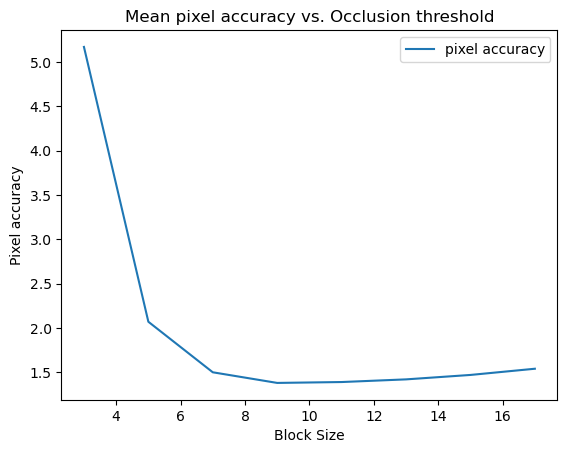

In [27]:
res = np.array(res)
### Create the plot
plt.plot(res[:,0], res[:,1], label='pixel accuracy')
# plt.plot(res[:,0], res[:,2], label='ps1')
# plt.plot(res[:,0], res[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('Mean pixel accuracy vs. Occlusion threshold')
plt.xlabel("Block Size")
plt.ylabel("Pixel accuracy")
plt.legend()

# Show the plot
plt.savefig("output/mean_acc_block_size.pdf")